Importation of modules and functions
===

In [ ]:
# Modules
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import datetime
import random

# Functions
from implementations import *
from helpers import *

# Autoreload
%load_ext autoreload
%autoreload 2

# Set random seed
np.random.seed(1)

Data loading
===

In [3]:
(labels_raw, data_raw, ids_raw) = load_csv_data("data/train.csv")
(t_labels, t_data_raw, t_ids) = load_csv_data("data/test.csv")

# Select portion of data 

In [3]:
"""labels_raw_portion = labels_raw[:10000]
data_raw_portion = data_raw[:10000,:]
ids_raw_portion = ids_raw[:10000]"""


'labels_raw_portion = labels_raw[:10000]\ndata_raw_portion = data_raw[:10000,:]\nids_raw_portion = ids_raw[:10000]'

Data filtering and standardization
===

In [39]:
data_, data_t_, labels = process_data(data_raw, t_data_raw, labels_raw, ids_raw,sample_filtering = False, feature_filtering = False, replace = 'zero')
data, means, variance = standardize(data_)
# need to standardize test using moments calculated from training
data_t = standardize_test(data_t_, means, variance)

# perform PCA

eigVal, eigVec, sumEigVal = PCA(data, threshold = 0.7)
data = data.dot(eigVec)
data_t = data_t.dot(eigVec)
print("we have reduce the number of feature with PCA to {0}".format(eigVec.shape[1]))

The original dimensions of the training data set was 250000 samples and 30 columns
 After feature and sample filtering, there are 250000 samples and 30 columns
we have reduce the number of feature with PCA to 9


Build data into matrix form
===

In [43]:
y, tx = build_model_data(data, labels)
y_t, tx_t = build_model_data(data_t,t_labels)

Splitting into train and test set
===

In [44]:
X_train, y_train, X_test, y_test = split_data(tx, y)

print('Standardized and randomized samples are found as the variables X_train, y_train, X_test, y_test. Values' +
      ' are split for testing and training sets with the ratio of 0.8')

Standardized and randomized samples are found as the variables X_train, y_train, X_test, y_test. Values are split for testing and training sets with the ratio of 0.8


Linear regression with gradient descent (GD)
===

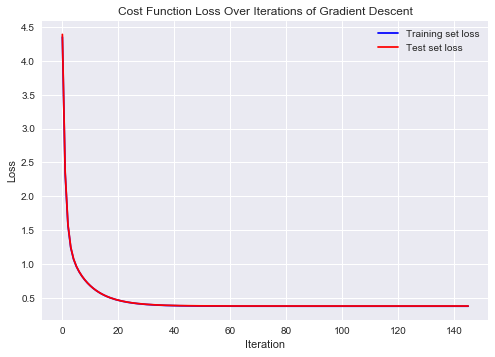

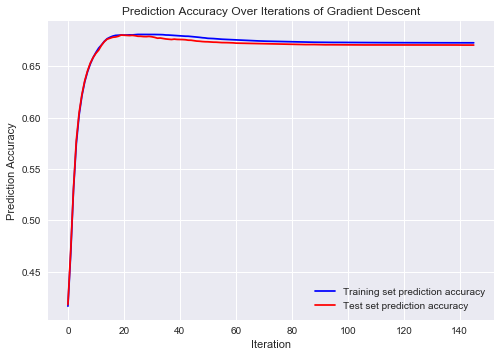

In [45]:
# initial_w = np.ones(X_train.shape[1])
initial_w = np.random.rand(X_train.shape[1])
losses, ws = least_squares_GD(y_train, X_train, initial_w, max_iters = 250) # fit model and retrieve W's across iterations
test_losses = list(map(lambda x: compute_loss(y_test, X_test, x, method = 'MSE'), ws)) # retrieve losses using test set with ws

plt.style.use('seaborn')
plt.plot(losses, label='Training set loss', c='blue')
plt.plot(test_losses, label='Test set loss', c='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Cost Function Loss Over Iterations of Gradient Descent')
plt.legend()
plt.show()

# Make plot with label prediction accuracy

pred_ytrain = list(map(lambda x: predict_labels(x, X_train), ws)) # Training prediction
pred_accuracytrain = list(map(lambda x: pred_accuracy(x, y_train), pred_ytrain))
pred_ytest = list(map(lambda x: predict_labels(x, X_test), ws)) # Test prediction
pred_accuracytest = list(map(lambda x: pred_accuracy(x, y_test), pred_ytest))


plt.plot(pred_accuracytrain, label='Training set prediction accuracy', c='blue')
plt.plot(pred_accuracytest, label='Test set prediction accuracy', c='red')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Prediction Accuracy')
plt.title('Prediction Accuracy Over Iterations of Gradient Descent')
plt.show()


Linear regression with stochastic gradient descent (SGD)
===

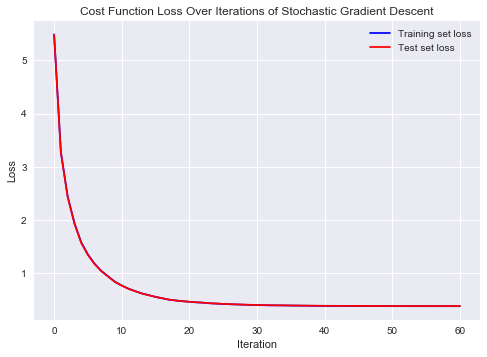

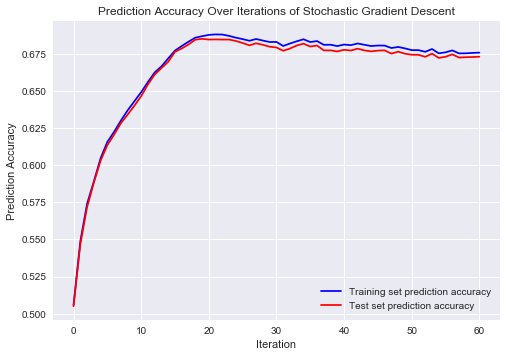

In [46]:
#initial_w = np.ones(X_train.shape[1])
initial_w = np.random.rand(X_train.shape[1])
losses, ws = least_squares_SGD(y_train, X_train, initial_w, max_iters = 250, tol = 1e-4, patience = 5) # fit model, retrieve parameters ws
test_losses = list(map(lambda x: compute_loss(y_test, X_test, x, method = 'MSE'), ws)) # retrieve losses using test set with ws

plt.style.use('seaborn')
plt.plot(losses, label='Training set loss', c='blue')
plt.plot(test_losses, label='Test set loss', c='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Cost Function Loss Over Iterations of Stochastic Gradient Descent')
plt.legend()
plt.show()

# Make plot with label prediction accuracy

pred_ytrain = list(map(lambda x: predict_labels(x, X_train), ws)) # Training prediction
pred_accuracytrain = list(map(lambda x: pred_accuracy(x, y_train), pred_ytrain))
pred_ytest = list(map(lambda x: predict_labels(x, X_test), ws)) # Test prediction
pred_accuracytest = list(map(lambda x: pred_accuracy(x, y_test), pred_ytest))


plt.plot(pred_accuracytrain, label='Training set prediction accuracy', c='blue')
plt.plot(pred_accuracytest, label='Test set prediction accuracy', c='red')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Prediction Accuracy')
plt.title('Prediction Accuracy Over Iterations of Stochastic Gradient Descent')
plt.show()


Linear regression using least squares normal equations
===

In [47]:
w = least_squares(y_train, X_train)

pred_y = predict_labels(w, X_test)
pred_accuracy(pred_y,y_test)

0.67072

Linear regression using the normal equations with additional polynomial degrees
===

degree: 1 	 rmse_ts: 0.870981147676749 	  pred_ts: 0.67072
degree: 2 	 rmse_ts: 0.855325638517719 	  pred_ts: 0.67428
degree: 3 	 rmse_ts: 0.8530173236819854 	  pred_ts: 0.67424
degree: 4 	 rmse_ts: 0.8476271946532643 	  pred_ts: 0.67474
degree: 5 	 rmse_ts: 0.8451225051773539 	  pred_ts: 0.67492
degree: 6 	 rmse_ts: 0.8422779195663359 	  pred_ts: 0.67622
degree: 7 	 rmse_ts: 0.841553284092691 	  pred_ts: 0.67584
degree: 8 	 rmse_ts: 0.8389133192461391 	  pred_ts: 0.67586
degree: 9 	 rmse_ts: 0.8443140602727282 	  pred_ts: 0.67624
degree: 10 	 rmse_ts: 0.8425381328036218 	  pred_ts: 0.6763
degree: 11 	 rmse_ts: 0.8369637575656702 	  pred_ts: 0.67686
degree: 12 	 rmse_ts: 0.8445957293395352 	  pred_ts: 0.6777
degree: 13 	 rmse_ts: 1.0242017070827996 	  pred_ts: 0.67766
degree: 14 	 rmse_ts: 1.4725886884998596 	  pred_ts: 0.67796


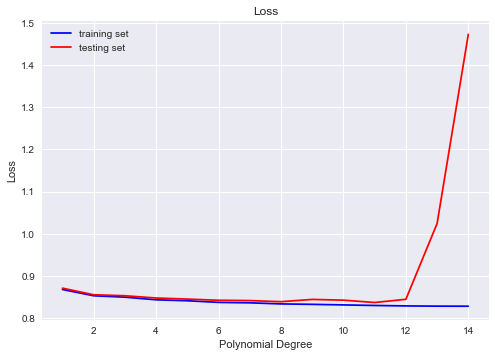

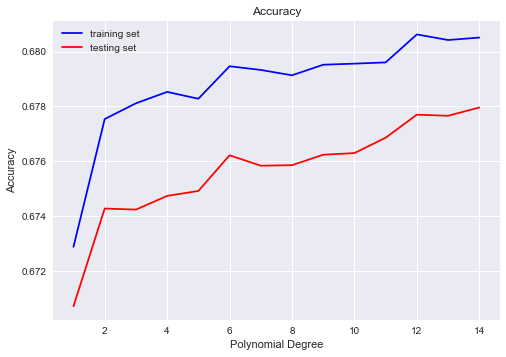

In [48]:
degrees = range(1,15)
rmse_tr = np.zeros(len(degrees))
rmse_ts = np.zeros(len(degrees))
pred_tr = np.zeros(len(degrees))
pred_ts = np.zeros(len(degrees))


for ind, degree in enumerate(degrees):
    #train the model
    X_test_poly = build_poly(X_test,degree)
    X_train_poly = build_poly(X_train,degree)
    w = least_squares(y_train, X_train_poly)
    rmse_tr[ind] = (np.sqrt(2 * compute_loss(y_train, X_train_poly, w)))
    pred_tr[ind] = pred_accuracy(predict_labels(w,X_train_poly),y_train)
    
    #test the model
    
    rmse_ts[ind] = (np.sqrt(2 * compute_loss(y_test, X_test_poly, w)))
    pred_ts[ind] = (pred_accuracy(predict_labels(w, X_test_poly),y_test))
    
    # print the update
    print("degree: {d} \t rmse_ts: {a} \t  pred_ts: {b}".format(d = degree, a = rmse_ts[ind], b = pred_ts[ind]))


    

# plot the loss
plt.style.use('seaborn')
plt.plot(degrees,rmse_tr, c='blue')
plt.plot(degrees,rmse_ts, c='red')
plt.title('Loss')
plt.xlabel('Polynomial Degree')
plt.ylabel('Loss')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.show()


#plot the accuracy
plt.style.use('seaborn')
plt.plot(degrees,pred_tr, c='blue')
plt.plot(degrees,pred_ts, c='red')
plt.title('Accuracy')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.show()


Linear regression using ridge regression
===

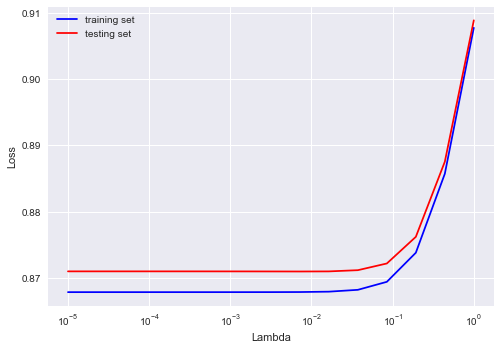

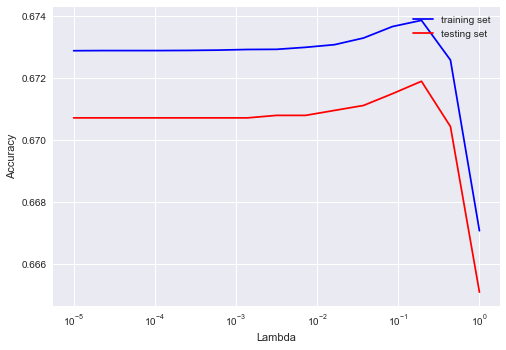

In [49]:
lambdas = np.logspace(-5, 0, 15)
rmse_tr = []
rmse_ts = []
pred_tr = []
pred_ts = []

for ind, lambda_ in enumerate(lambdas):
    
    w = ridge_regression(y_train, X_train, lambda_)
    rmse_tr.append(np.sqrt(2 * compute_loss(y_train, X_train, w)))
    pred_tr.append(pred_accuracy(predict_labels(w, X_train),y_train))
    
    
    rmse_ts.append(np.sqrt(2 * compute_loss(y_test, X_test, w)))
    pred_ts.append(pred_accuracy(predict_labels(w, X_test),y_test))
    
plt.style.use('seaborn')
plt.semilogx(lambdas,rmse_tr, c='blue')
plt.semilogx(lambdas,rmse_ts, c='red')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.xlabel('Lambda')
plt.ylabel('Loss')
plt.show()

plt.style.use('seaborn')
plt.semilogx(lambdas,pred_tr, c='blue')
plt.semilogx(lambdas,pred_ts, c='red')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.legend(['training set', 'testing set'], loc='upper right')
plt.show()

# print(np.max(pred))

# Logistic regression

In [186]:
def prepare_standardplot(title, xlabel):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(title)
    ax1.set_ylabel('categorical cross entropy')
    ax1.set_xlabel(xlabel)
    ax1.set_yscale('log')
    ax2.set_ylabel('accuracy [% correct]')
    ax2.set_xlabel(xlabel)
    return fig, ax1, ax2

def finalize_standardplot(fig, ax1, ax2):
    ax1handles, ax1labels = ax1.get_legend_handles_labels()
    if len(ax1labels) > 0:
        ax1.legend(ax1handles, ax1labels)
    ax2handles, ax2labels = ax2.get_legend_handles_labels()
    if len(ax2labels) > 0:
        ax2.legend(ax2handles, ax2labels)
    fig.tight_layout()
    plt.subplots_adjust(top=0.9)

def plotCurves(tr_loss, tr_acc, ts_loss, ts_acc, title):
    fig, ax1, ax2 = prepare_standardplot(title, 'epoch')
    ax1.plot(tr_loss, label = "training")
    ax1.plot(ts_loss, label = "validation")
    ax2.plot(tr_acc, label = "training")
    ax2.plot(ts_acc, label = "validation")
    finalize_standardplot(fig, ax1, ax2)
    return fig

iteration: 0 | loss : 330800.5449043297
iteration: 500 | loss : 153645.9275764422
iteration: 1000 | loss : 183094.10488940883
iteration: 1500 | loss : 225738.6592169643


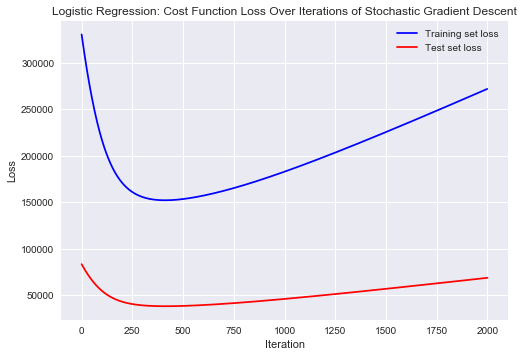

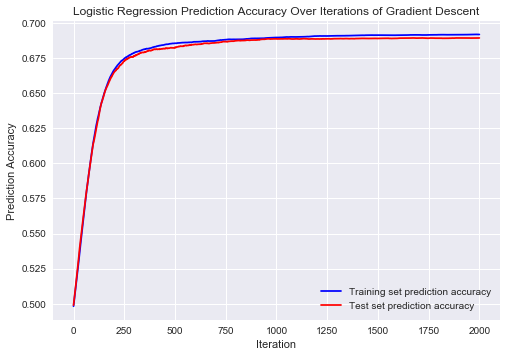

In [67]:
initial_w = np.random.rand(X_train.shape[1])
losses, ws = logistic_regression(y_train, X_train, initial_w, method = 'gd', max_iters = 2000) # fit model, retrieve parameters ws
test_losses = list(map(lambda x: compute_loss(y_test, X_test, x, lam = 0, method = "logistic"), ws)) # retrieve losses using test set with ws

plt.style.use('seaborn')
plt.plot(losses, label='Training set loss', c='blue')
plt.plot(test_losses, label='Test set loss', c='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Logistic Regression: Cost Function Loss Over Iterations of Stochastic Gradient Descent')
plt.legend()
plt.show()

# Make plot with label prediction accuracy

pred_ytrain = list(map(lambda x: predict_labels(x, X_train), ws)) # Training prediction
pred_accuracytrain = list(map(lambda x: pred_accuracy(x, y_train), pred_ytrain))
pred_ytest = list(map(lambda x: predict_labels(x, X_test), ws)) # Test prediction
pred_accuracytest = list(map(lambda x: pred_accuracy(x, y_test), pred_ytest))


plt.plot(pred_accuracytrain, label='Training set prediction accuracy', c='blue')
plt.plot(pred_accuracytest, label='Test set prediction accuracy', c='red')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Prediction Accuracy')
plt.title('Logistic Regression Prediction Accuracy Over Iterations of Gradient Descent')
plt.show()

iteration: 0 | loss : 227953.3945772423
iteration: 500 | loss : 196955.72426683988
iteration: 1000 | loss : 176715.26907234636
iteration: 1500 | loss : 163115.777717056
iteration: 2000 | loss : 153725.29116707368
iteration: 2500 | loss : 147145.4918895914
iteration: 3000 | loss : 142567.40618692004
iteration: 3500 | loss : 139507.1131453594
iteration: 4000 | loss : 137655.4927070177
iteration: 4500 | loss : 136800.75617117313
iteration: 5000 | loss : 136781.31444275493
iteration: 5500 | loss : 137467.88089928543
iteration: 6000 | loss : 138754.6118119285
iteration: 6500 | loss : 140552.10759080277
iteration: 7000 | loss : 142784.09360207204
iteration: 7500 | loss : 145385.2972419898
iteration: 8000 | loss : 148299.93949061396
iteration: 8500 | loss : 151480.52207348918
iteration: 9000 | loss : 154886.7377233782
iteration: 9500 | loss : 158484.46743888792


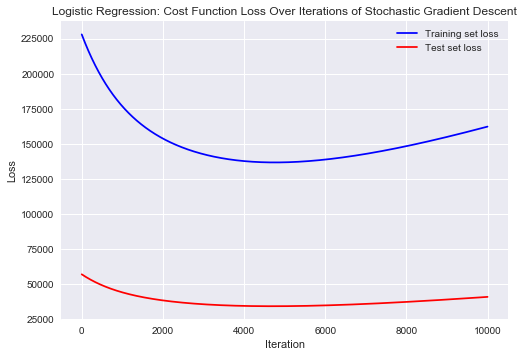

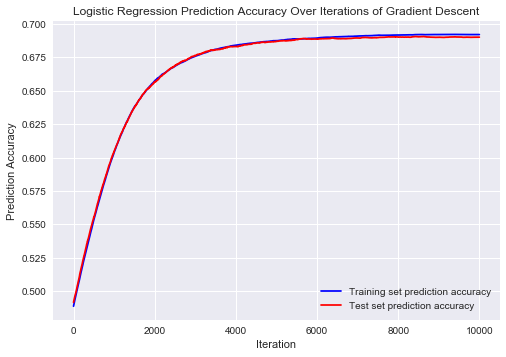

In [69]:
initial_w = np.random.rand(X_train.shape[1])
losses, ws = logistic_regression(y_train, X_train, initial_w, method = 'gd', max_iters = 10000) # fit model, retrieve parameters ws
test_losses = list(map(lambda x: compute_loss(y_test, X_test, x, lam = 0, method = "logistic"), ws)) # retrieve losses using test set with ws

plt.style.use('seaborn')
plt.plot(losses, label='Training set loss', c='blue')
plt.plot(test_losses, label='Test set loss', c='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Logistic Regression: Cost Function Loss Over Iterations of Stochastic Gradient Descent')
plt.legend()
plt.show()

# Make plot with label prediction accuracy

pred_ytrain = list(map(lambda x: predict_labels(x, X_train), ws)) # Training prediction
pred_accuracytrain = list(map(lambda x: pred_accuracy(x, y_train), pred_ytrain))
pred_ytest = list(map(lambda x: predict_labels(x, X_test), ws)) # Test prediction
pred_accuracytest = list(map(lambda x: pred_accuracy(x, y_test), pred_ytest))


plt.plot(pred_accuracytrain, label='Training set prediction accuracy', c='blue')
plt.plot(pred_accuracytest, label='Test set prediction accuracy', c='red')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Prediction Accuracy')
plt.title('Logistic Regression Prediction Accuracy Over Iterations of Gradient Descent')
plt.show()

In [140]:
y_sample = y[:10000] 
tx_sample = tx[:10000,:]

X_train_sample, y_train_sample, X_test_sample, y_test_sample = split_data(tx_sample, y_sample)

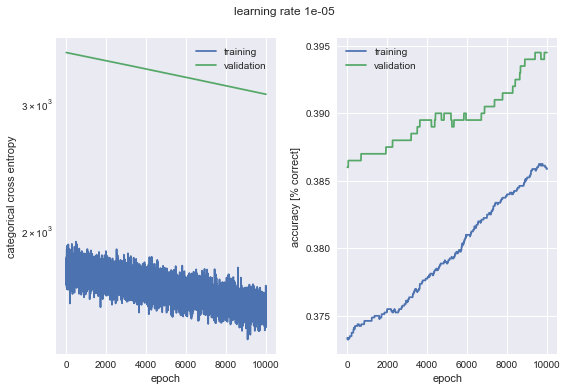

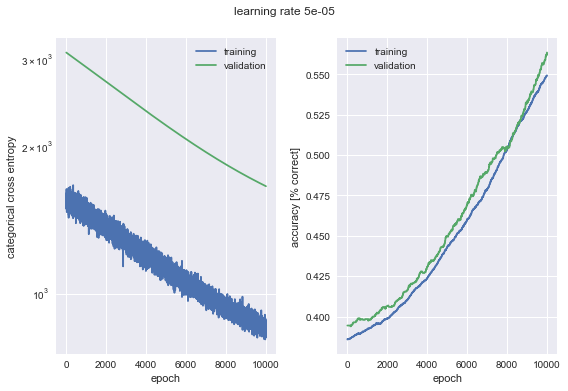

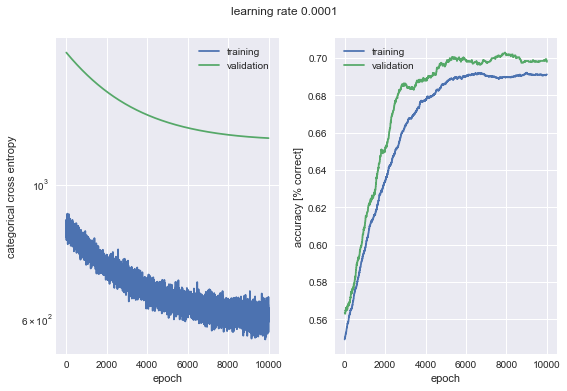

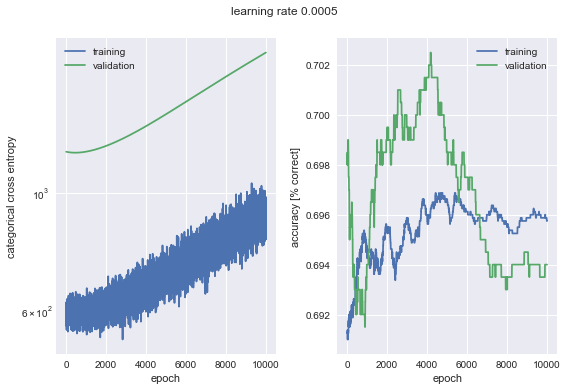

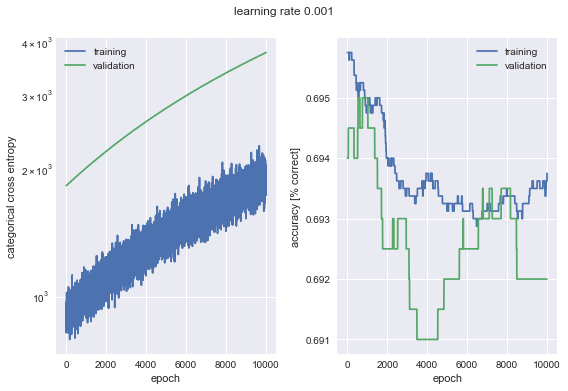

In [196]:
num_iter = 10000

lr = [0.00001,0.00005,0.0001,0.0005,0.001] 


test_losses  = np.zeros([len(lr),(num_iter+1)])
test_acc = np.zeros([len(lr),(num_iter+1)])
train_losses = np.zeros([len(lr),(num_iter)])
train_acc= np.zeros([len(lr),(num_iter+1)])

initial_w = np.random.rand(X_train.shape[1])

for i in range(len(lr)):
    
    l_tr, ws = logistic_regression(y_train_sample, X_train_sample, initial_w, max_iters = num_iter, gamma = lr[i], method = 'sgd') # fit model, retrieve parameters ws
    train_losses[i,:] = np.array(l_tr)
    l_ts = list(map(lambda x: compute_loss(y_test_sample, X_test_sample, x, lam = 0, method = "logistic"), ws)) # retrieve losses using test set with ws
    test_losses[i,:] = np.array(l_ts)
    pred_ytrain = list(map(lambda x: predict_labels(x, X_train_sample), ws)) # Training prediction
    train_acc[i,:] = list(map(lambda x: pred_accuracy(x, y_train_sample), pred_ytrain))
    pred_ytest = list(map(lambda x: predict_labels(x, X_test_sample), ws)) # Test prediction
    test_acc[i,:] = list(map(lambda x: pred_accuracy(x, y_test_sample), pred_ytest))

for i in range(len(lr)):
    titre = "learning rate "+str(lr[i])
    plotCurves(train_losses[i,:], train_acc[i,:], test_losses[i,:], test_acc[i,:], titre)


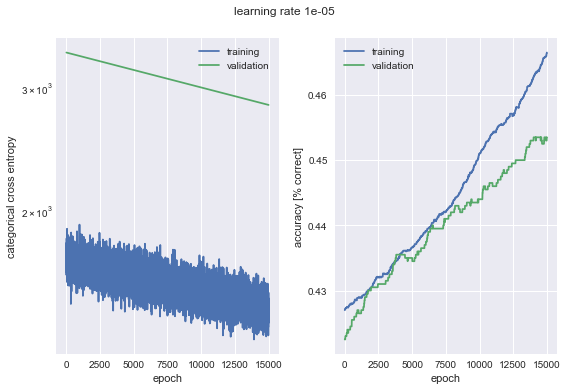

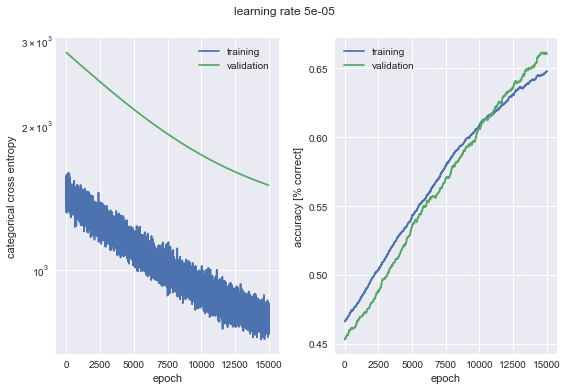

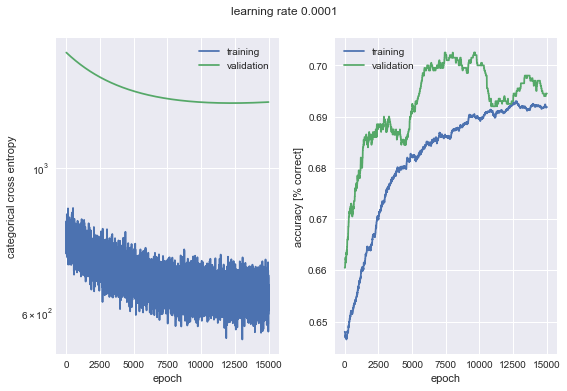

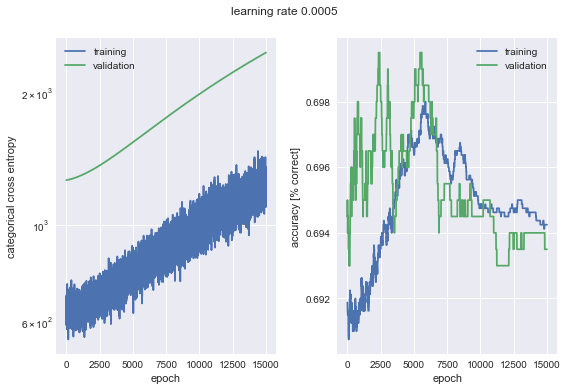

In [197]:
num_iter = 15000

lr = [0.00001,0.00005,0.0001,0.0005] 


test_losses  = np.zeros([len(lr),(num_iter+1)])
test_acc = np.zeros([len(lr),(num_iter+1)])
train_losses = np.zeros([len(lr),(num_iter)])
train_acc= np.zeros([len(lr),(num_iter+1)])

initial_w = np.random.rand(X_train.shape[1])

for i in range(len(lr)):
    
    l_tr, ws = logistic_regression(y_train_sample, X_train_sample, initial_w, max_iters = num_iter, gamma = lr[i], method = 'sgd') # fit model, retrieve parameters ws
    train_losses[i,:] = np.array(l_tr)
    l_ts = list(map(lambda x: compute_loss(y_test_sample, X_test_sample, x, lam = 0, method = "logistic"), ws)) # retrieve losses using test set with ws
    test_losses[i,:] = np.array(l_ts)
    pred_ytrain = list(map(lambda x: predict_labels(x, X_train_sample), ws)) # Training prediction
    train_acc[i,:] = list(map(lambda x: pred_accuracy(x, y_train_sample), pred_ytrain))
    pred_ytest = list(map(lambda x: predict_labels(x, X_test_sample), ws)) # Test prediction
    test_acc[i,:] = list(map(lambda x: pred_accuracy(x, y_test_sample), pred_ytest))
    
for i in range(len(lr)):
    titre = "learning rate "+str(lr[i])
    plotCurves(train_losses[i,:], train_acc[i,:], test_losses[i,:], test_acc[i,:], titre)
    

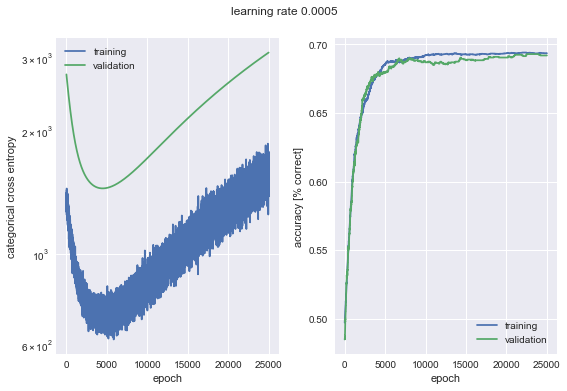

In [198]:
num_iter = 25000

lr = [0.0005] 


initial_w = np.random.rand(X_train.shape[1])

for i in range(len(lr)):
    
    l_tr, ws = logistic_regression(y_train_sample, X_train_sample, initial_w, max_iters = num_iter, gamma = lr[i], method = 'sgd') # fit model, retrieve parameters ws
    
    l_ts = list(map(lambda x: compute_loss(y_test_sample, X_test_sample, x, lam = 0, method = "logistic"), ws)) # retrieve losses using test set with ws
    
    pred_ytrain = list(map(lambda x: predict_labels(x, X_train_sample), ws)) # Training prediction
    a_tr = list(map(lambda x: pred_accuracy(x, y_train_sample), pred_ytrain))
    pred_ytest = list(map(lambda x: predict_labels(x, X_test_sample), ws)) # Test prediction
    a_ts = list(map(lambda x: pred_accuracy(x, y_test_sample), pred_ytest))
    tire = "learning rate of 0.0005"
    plotCurves(l_tr, a_tr, l_ts, a_ts, titre)


Logistic regression using Newton's method
===

In [ ]:
# initial_w = np.random.rand(X_train.shape[1])
# losses, ws = logistic_hessian(y_train, X_train, initial_w) # fit model, retrieve parameters ws
# test_losses = list(map(lambda x: compute_loss(y_test, X_test, x, method = 'MSE'), ws)) # retrieve losses using test set with ws

# plt.style.use('seaborn')
# plt.plot(losses, label='Training set loss', c='blue')
# plt.plot(test_losses, label='Test set loss', c='red')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.title('Logistic Regression: Cost Function Loss Over Iterations of Stochastic Gradient Descent')
# plt.legend()
# plt.show()

# # Make plot with label prediction accuracy

# pred_ytrain = list(map(lambda x: predict_labels(x, X_train), ws)) # Training prediction
# pred_accuracytrain = list(map(lambda x: pred_accuracy(x, y_train), pred_ytrain))
# pred_ytest = list(map(lambda x: predict_labels(x, X_test), ws)) # Test prediction
# pred_accuracytest = list(map(lambda x: pred_accuracy(x, y_test), pred_ytest))


# plt.plot(pred_accuracytrain, label='Training set prediction accuracy', c='blue')
# plt.plot(pred_accuracytest, label='Test set prediction accuracy', c='red')
# plt.legend()
# plt.xlabel('Iteration')
# plt.ylabel('Prediction Accuracy')
# plt.title('Logistic Regression Prediction Accuracy Over Iterations of Gradient Descent')
# plt.show()

"""IF YOU READ THIS: I tried doing something here so that LR is faster and more accurate,
the problem is that we can't calculate things that way, it's too big, but maybe I'll find a way
another time."""

# Regularized Logistic Regression

In [ ]:
lambdas = np.logspace(-5, 0, 5)
loss_tr = []
loss_ts = []
pred_tr = []
pred_ts = []
initial_w = np.random.rand(X_train.shape[1])

# There is a runtime warning but just be patient

for ind, lambda_ in enumerate(lambdas):
    
    losses, ws = reg_logistic_regression(y_train, X_train, initial_w, lamb = lambda_, methods ='gd', gamma = 0.01, max_iters=6000)
    loss_tr.append(losses[-1])
    best_w = ws[-1]
    
    pred_tr.append(pred_accuracy(predict_labels(best_w, X_train),y_train))
    
    test_losses = compute_loss(y_test, X_test, best_w, lam = lambda_, method = 'reg_logistic') # retrieve losses using test set with ws
    loss_ts.append(test_losses)
    pred_ts.append(pred_accuracy(predict_labels(best_w, X_test),y_test))

    
plt.style.use('seaborn')
plt.semilogx(lambdas,loss_tr, c='blue')
plt.semilogx(lambdas,loss_ts, c='red')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.xlabel('Lambda')
plt.ylabel('Loss')
plt.show()

plt.style.use('seaborn')
plt.semilogx(lambdas,pred_tr, c='blue')
plt.semilogx(lambdas,pred_ts, c='red')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.legend(['training set', 'testing set'], loc='upper right')
plt.show()

####


In [ ]:
# lamb = 0.1
# losses, ws = reg_logistic_regression(y_train, X_train, 
#                          initial_w, lamb, methods = 'gd', 
#                          gamma = 0.01, max_iters= 6000)

# test_losses = list(map(lambda x: compute_loss(y_test, X_test, x, lam = lamb, method = 'reg_logistic'), ws)) # retrieve losses using test set with ws
# plt.style.use('seaborn')
# plt.plot(losses, label='Training set loss', c='blue')
# plt.plot(test_losses, label='Test set loss', c='red')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.title('Regularized Logistic Regression: Cost Function Loss Over Iterations of Gradient Descent')
# plt.legend()
# plt.show()

# # Make plot with label prediction accuracy

# pred_ytrain = list(map(lambda x: predict_labels(x, X_train), ws)) # Training prediction
# pred_accuracytrain = list(map(lambda x: pred_accuracy(x, y_train), pred_ytrain))
# pred_ytest = list(map(lambda x: predict_labels(x, X_test), ws)) # Test prediction
# pred_accuracytest = list(map(lambda x: pred_accuracy(x, y_test), pred_ytest))


# plt.plot(pred_accuracytrain, label='Training set prediction accuracy', c='blue')
# plt.plot(pred_accuracytest, label='Test set prediction accuracy', c='red')
# plt.legend()
# plt.xlabel('Iteration')
# plt.ylabel('Prediction Accuracy')
# plt.title('Regularized Logistic Regression Prediction Accuracy Over Iterations of Gradient Descent')
# plt.show()

### Using the polynomial model

In [ ]:
degree = 12
X_test_poly = build_poly(data_test,degree)
X_train_poly = build_poly(data,degree)
w = least_squares(labels, X_train_poly)
rmse_tr = (np.sqrt(2 * compute_loss(labels, X_train_poly, w)))
pred_tr = pred_accuracy(predict_labels(w,X_train_poly),labels)

test_prediction = predict_labels(w, X_test_poly)
    

In [ ]:
name = "prediction.csv"
ids = ids_test
y_pred = test_prediction
create_csv_submission(ids, y_pred, name)

# this yielded like 0.62 on kaggle

### Using logistic regression

In [ ]:
initial_w = np.ones(tx.shape[1])
y[y == -1] = 0
losses, ws = logistic_regression(y, tx, initial_w, method = 'gd', max_iters = 6000) # fit model, retrieve parameters ws

In [8]:
pred = tx_t.dot(ws[-1])
pred[np.where(pred <= 0.5)] = -1
pred[np.where(pred > 0.5)] = 1

name = "prediction.csv"
create_csv_submission(t_ids, pred, name)

# this yields 0.73 on kaggle